## Area classification

In [7]:
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np

import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
import chart_studio.plotly as py
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [8]:
df=pd.read_excel("./classification of area/1998-2019.xls")

In [9]:
df_rain=pd.read_excel("rain_fall_cleaned_classification_area.xlsx")

In [10]:
df=df[df['District'].isin(['ARARIA', 'AURANGABAD', 'BEGUSARAI', 'BHAGALPUR', 'BHOJPUR',
       'DARBHANGA', 'GAYA', 'GOPALGANJ', 'JAMUI', 'JEHANABAD', 'KATIHAR',
       'KHAGARIA', 'KISHANGANJ', 'LAKHISARAI', 'MADHEPURA', 'MADHUBANI',
       'MUNGER', 'MUZAFFARPUR', 'NALANDA', 'NAWADA', 'PATNA', 'ROHTAS',
       'SAHARSA', 'SAMASTIPUR', 'SHEIKHPURA', 'SITAMARHI', 'SIWAN',
       'SUPAUL', 'VAISHALI', 'CHAMPARAN', 'PURNIA'])]

In [11]:
df

,District,Reporting Area \nfor LUS,Forests NC,Area Under Non Agricultural Uses NC,Barren and Unculturable Land NC,Total NC,Permanent Pasture and Other Grazing Land,Land Under Misc. Tree Crops and Groves not Included in Net Area Sown,Culturable Waste Land,Total excluding fallow land,Fallow Lands Other Than Current Fallows,Current Fallow,Total,Net Area Sown,Cropped Area,Area Sown More Than Once,Year,yearC
0,ARARIA,271712,838,51116,5085,56201,156,18716,586,19458,3330,11972,15302,179913,265312,85399,1998-99,1998
1,AURANGABAD,330011,13575,55081,16440,71521,628,394,1941,2963,7742,72735,80477,161475,249688,88213,1998-99,1998
3,BEGUSARAI,187828,0,43627,18133,61760,24,3240,47,3311,1034,7063,8097,114660,189012,74352,1998-99,1998
4,BHAGALPUR,254300,78,67193,22617,89810,651,6307,2365,9323,3876,5582,9458,145631,184249,38618,1998-99,1998
5,BHOJPUR,237339,0,32763,6898,39661,88,1595,648,2331,2941,9931,12872,182475,219904,37429,1998-99,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,SHEIKHPURA,62084,0,10657,1017,11674,0,322,215,537,1604,4236,5840,44033,55914,11881,2018-19,2018
825,SITAMARHI,221891,0,63679,1751,65430,1338,13966,113,15417,464,12604,13068,127976,233135,105159,2018-19,2018
826,SIWAN,224410,0,33297,8741,42038,145,8968,679,9792,1405,6111,7516,165064,224847,59783,2018-19,2018
827,SUPAUL,238603,0,52107,20229,72336,238,3132,1104,4474,9403,13778,23181,138612,239221,100609,2018-19,2018


In [12]:
df_cult_land=df[['Net Area Sown','Cropped Area','Area Sown More Than Once','Year','District']]

In [13]:
df_fallow_land=df[['Fallow Lands Other Than Current Fallows','Current Fallow','District','Year','yearC']]

In [14]:
df_noncult_land=df[['Forests NC','Area Under Non Agricultural Uses NC','Barren and Unculturable Land NC','Year','District']]

## Unculturable lands

In [15]:
df_noncult_land

,Forests NC,Area Under Non Agricultural Uses NC,Barren and Unculturable Land NC,Year,District
0,838,51116,5085,1998-99,ARARIA
1,13575,55081,16440,1998-99,AURANGABAD
3,0,43627,18133,1998-99,BEGUSARAI
4,78,67193,22617,1998-99,BHAGALPUR
5,0,32763,6898,1998-99,BHOJPUR
...,...,...,...,...,...
823,0,10657,1017,2018-19,SHEIKHPURA
825,0,63679,1751,2018-19,SITAMARHI
826,0,33297,8741,2018-19,SIWAN
827,0,52107,20229,2018-19,SUPAUL


In [16]:

noncult_yearwise=df_noncult_land.groupby(by='Year').sum().reset_index()

fig = go.Figure(data=[
    go.Bar(name='Non Agricultutural use', x=noncult_yearwise['Year'], y=noncult_yearwise['Area Under Non Agricultural Uses NC'],text=noncult_yearwise['Area Under Non Agricultural Uses NC']),
#     go.Line(name='major Area', x=major_prod['Year'], y=major_prod['Area']),
     go.Bar(name='Barren', x=noncult_yearwise['Year'], y=noncult_yearwise['Barren and Unculturable Land NC'],text=noncult_yearwise['Barren and Unculturable Land NC'])
#     go.Line(name='minor Area', x=minor_prod['Year'], y=minor_prod['Area']),
])
# Change the bar mode
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Rate of changing Non agricultural and Barren land throughout years',width=1000, height=600)
fig.update_traces(texttemplate='%{text:.3s}')
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()

In [17]:
cult_yearwise=df_cult_land.groupby(by='Year').sum().reset_index()

fig = go.Figure(data=[
    go.Bar(name='Cropped Area', x=cult_yearwise['Year'], y=cult_yearwise['Cropped Area'],text=cult_yearwise['Cropped Area']),
#     go.Line(name='major Area', x=major_prod['Year'], y=major_prod['Area']),
     go.Bar(name='Net Area Sown', x=cult_yearwise['Year'], y=cult_yearwise['Net Area Sown'],text=cult_yearwise['Net Area Sown'])
#     go.Line(name='minor Area', x=minor_prod['Year'], y=minor_prod['Area']),
])
# Change the bar mode
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Rate of changing cropped and sown area throughout years',width=1000, height=600)
fig.update_traces(texttemplate='%{text:.3s}')
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()

In [18]:
df_noncult_land=df_noncult_land[~(df_noncult_land['Forests NC'] <= 600)] 

In [19]:
labels=list(df_noncult_land['District'])
values =list(df_noncult_land[df_noncult_land['Year']=='1998-99']['Forests NC'])
title='Distribution of Forests in Bihar with more than 600 hect. of forest'
layout = go.Layout(
        title=title,
        height=800,width=1000,margin=go.Margin(l=0, r=200, b=100, t=100, pad=4)  
        )

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial')],layout=layout)
fig.show()

C:\hp\BIN\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




## Culturable land

In [20]:
df_cult_land

,Net Area Sown,Cropped Area,Area Sown More Than Once,Year,District
0,179913,265312,85399,1998-99,ARARIA
1,161475,249688,88213,1998-99,AURANGABAD
3,114660,189012,74352,1998-99,BEGUSARAI
4,145631,184249,38618,1998-99,BHAGALPUR
5,182475,219904,37429,1998-99,BHOJPUR
...,...,...,...,...,...
823,44033,55914,11881,2018-19,SHEIKHPURA
825,127976,233135,105159,2018-19,SITAMARHI
826,165064,224847,59783,2018-19,SIWAN
827,138612,239221,100609,2018-19,SUPAUL


In [21]:
# pip install dataframe_image

In [22]:
import dataframe_image as dfi
temp=df_cult_land[df_cult_land['Year']=='1998-99'].drop('Area Sown More Than Once',axis=1)
temp1=df_cult_land[df_cult_land['Year']=='2017-18'].drop('Area Sown More Than Once',axis=1)
temp2=pd.merge(temp,temp1,how='inner',on='District')

temp2=temp2.drop(['Year_x','Year_y'],axis=1)
temp2=temp2.style.background_gradient(cmap='Reds')
# dfi.export(temp2, 'compare_graph.png')
temp2

,Net Area Sown_x,Cropped Area_x,District,Net Area Sown_y,Cropped Area_y
0,179913,265312,ARARIA,113592,153028
1,181227,296348,ARARIA,113592,153028
2,161475,249688,AURANGABAD,205617,287346
3,114660,189012,BEGUSARAI,107587,157705
4,145631,184249,BHAGALPUR,123002,149286
5,182475,219904,BHOJPUR,186358,199263
6,175267,244860,DARBHANGA,147483,171924
7,198123,251214,GAYA,182901,212869
8,152534,239959,GOPALGANJ,139476,207387
9,71482,80911,JAMUI,70744,126168


#### Districts who utilises most of their Agricultural land (more than 80%)

In [23]:
df_max_util=df_cult_land.groupby(by='District').sum().reset_index()
df_max_util['util']=((df_max_util['Net Area Sown']/df_max_util['Cropped Area'])*100).map("{:,.2f}%".format)
# df_max_util[df_max_util['util']>='80.00%']
fig = go.Figure(data=[go.Table(
    header=dict(values=['Districts','utilization'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[df_max_util[df_max_util['util']>='80.00%']['District'], # 1st column
                       df_max_util[df_max_util['util']>='80.00%']['util']], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
],)

fig.update_layout(width=400, height=400,title='Leading utilizers of Crops')
fig.show()


#### Districts who utilises most of their Agricultural land (less than 65%)

In [24]:
df_max_util=df_cult_land.groupby(by='District').sum().reset_index()
df_max_util['util']=((df_max_util['Net Area Sown']/df_max_util['Cropped Area'])*100).map("{:,.2f}%".format)
# df_max_util[df_max_util['util']<='65.00%']
fig = go.Figure(data=[go.Table(
    header=dict(values=['Districts','utilization'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[df_max_util[df_max_util['util']<='65.00%']['District'], # 1st column
                       df_max_util[df_max_util['util']<='65.00%']['util']], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
],)

fig.update_layout(width=400, height=400,title='minor utilizers of Crops')
fig.show()

In [25]:
df_cult_land['util']=((df_cult_land['Net Area Sown']/df_cult_land['Cropped Area'])*100)
df_cult_land

,Net Area Sown,Cropped Area,Area Sown More Than Once,Year,District,util
0,179913,265312,85399,1998-99,ARARIA,67.811859
1,161475,249688,88213,1998-99,AURANGABAD,64.670709
3,114660,189012,74352,1998-99,BEGUSARAI,60.662815
4,145631,184249,38618,1998-99,BHAGALPUR,79.040320
5,182475,219904,37429,1998-99,BHOJPUR,82.979391
...,...,...,...,...,...,...
823,44033,55914,11881,2018-19,SHEIKHPURA,78.751297
825,127976,233135,105159,2018-19,SITAMARHI,54.893517
826,165064,224847,59783,2018-19,SIWAN,73.411698
827,138612,239221,100609,2018-19,SUPAUL,57.943074


### Cropped Area(C) vs Net area sown(N)
#### Maximum the (N/C) value more the culturable land 

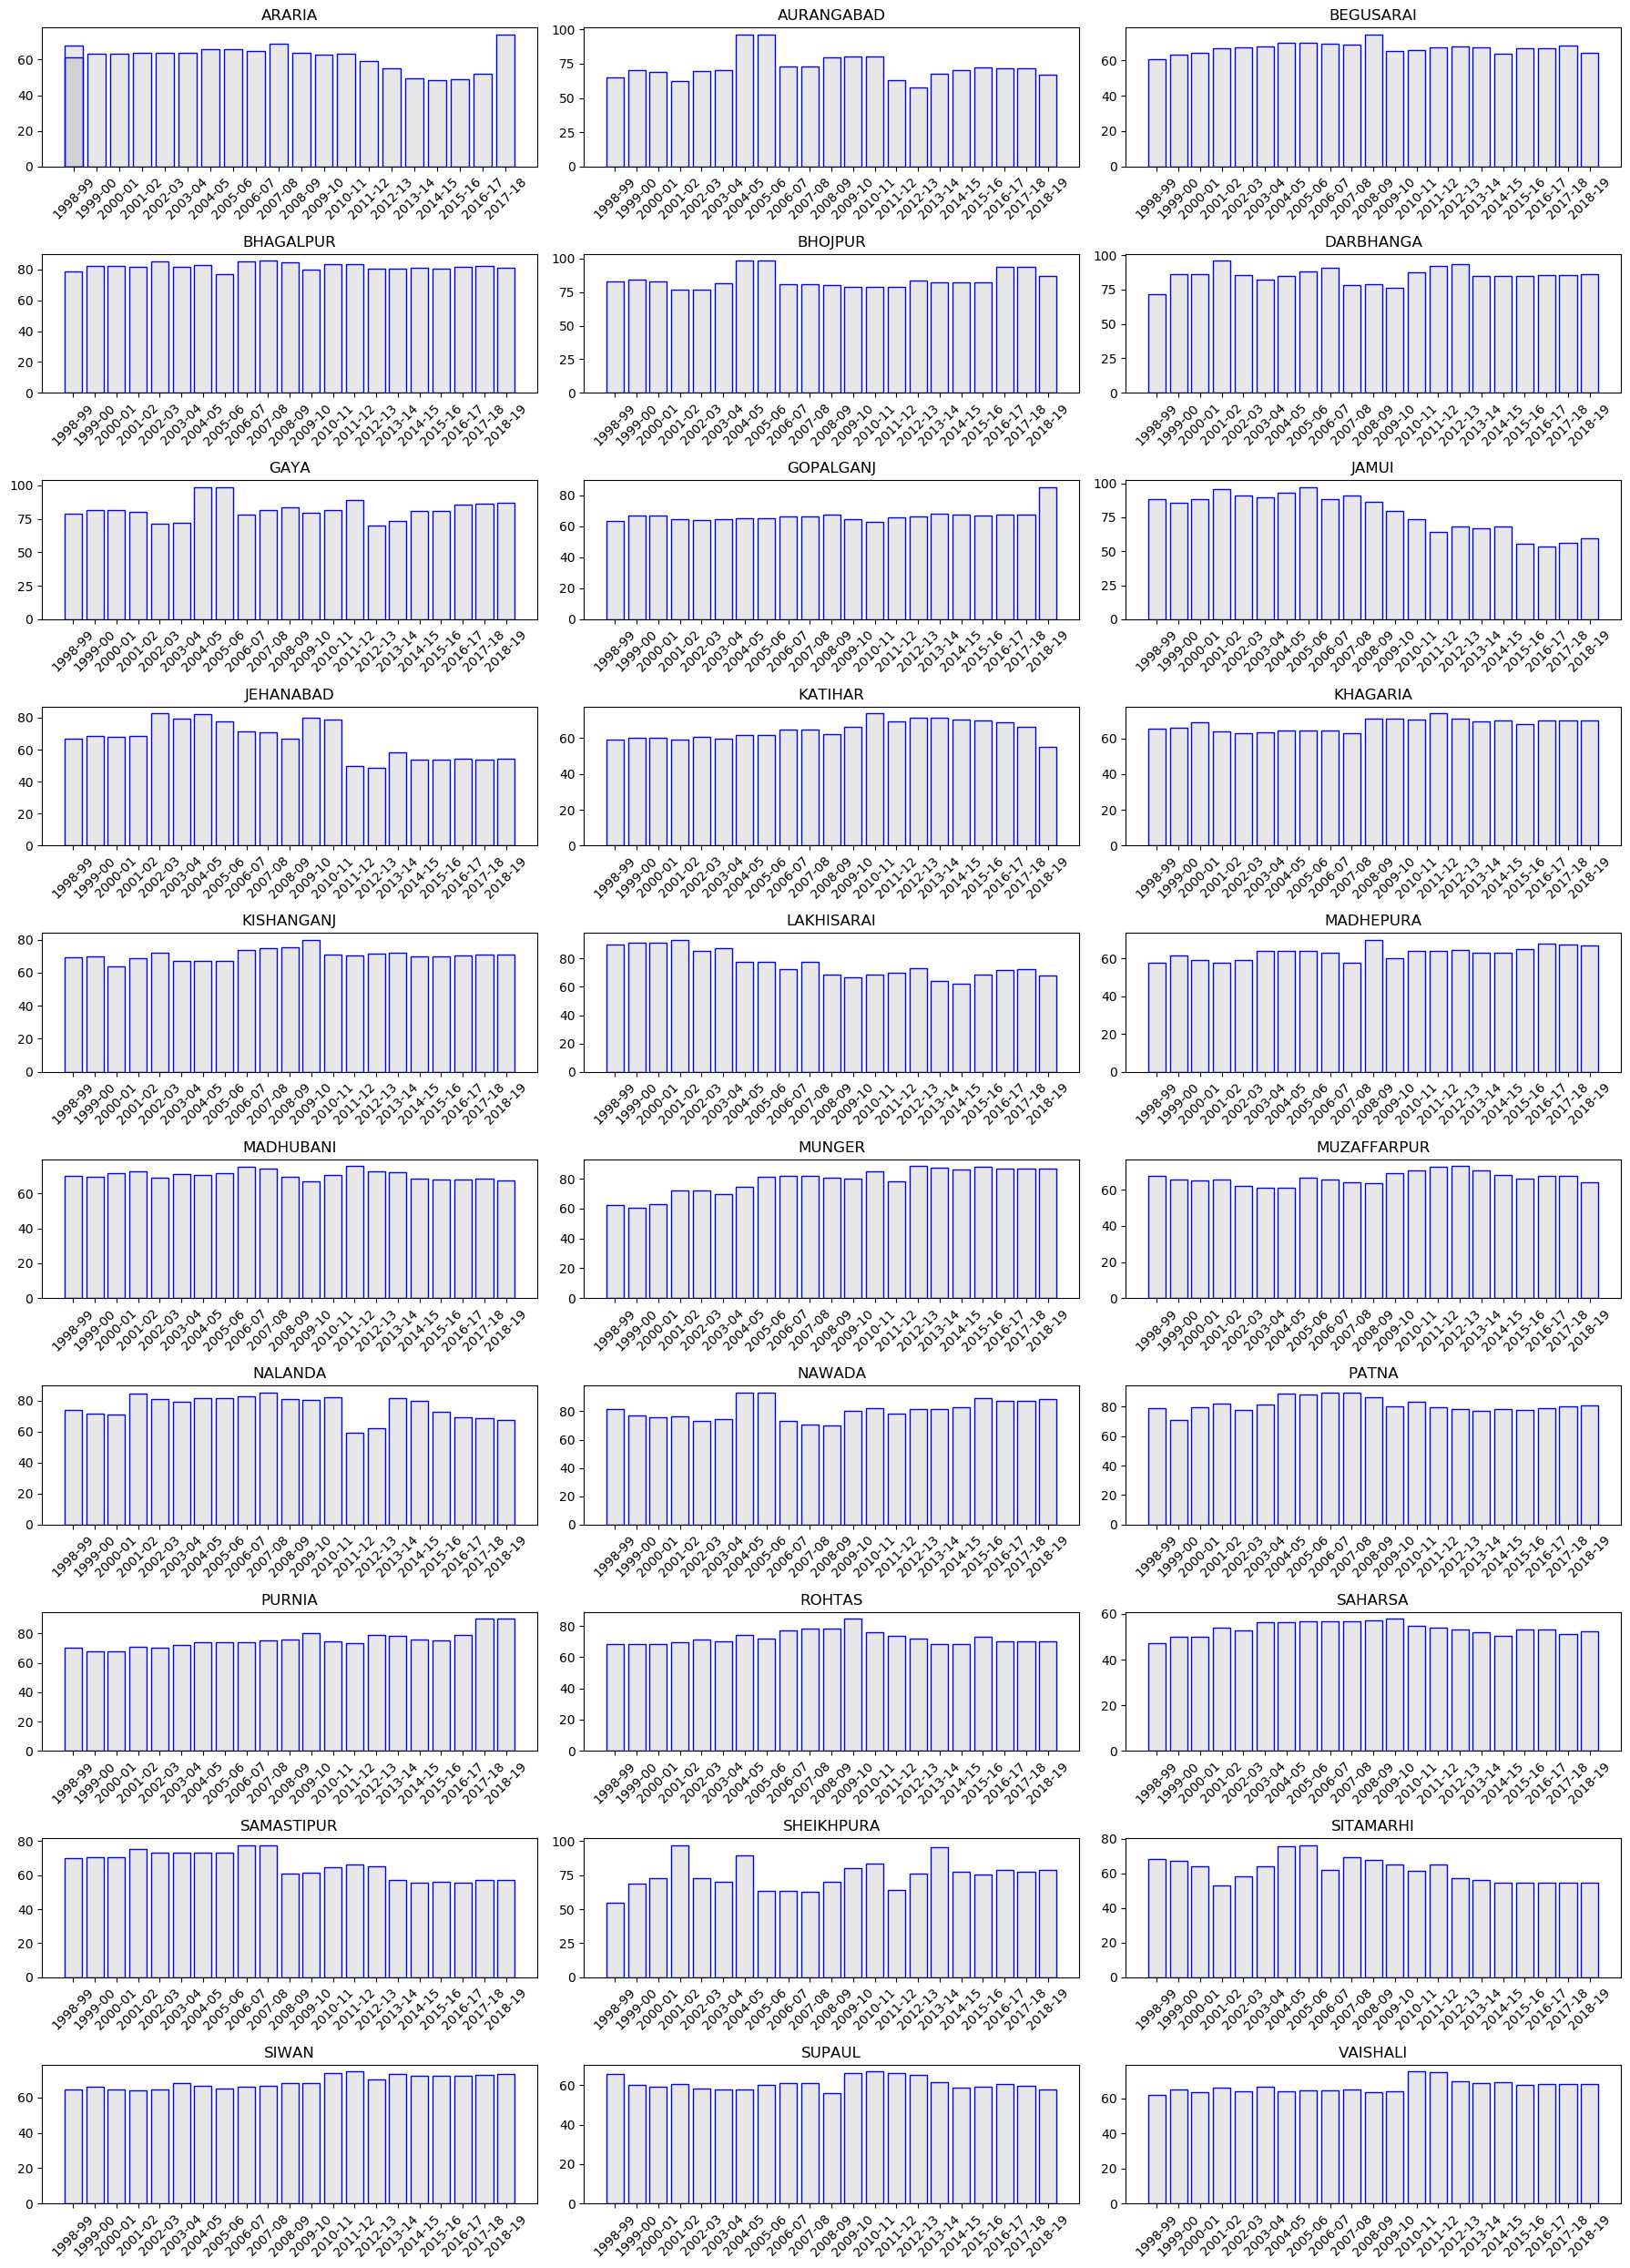

In [26]:
ct = 1
fig = mplot.figure(figsize=(18,25),dpi=100)
for i in df_cult_land['District'].unique():
    tp= df_cult_land[df_cult_land['District']==i]
    mplot.subplot(10,3,ct)
    mplot.bar(tp.iloc[:,3],tp.iloc[:,5],color=(0.1, 0.1, 0.1, 0.1),edgecolor='blue')
#     mplot.bar(tp.iloc[:,3],tp.iloc[:,0])
    mplot.title(i)
    ct+=1
    mplot.xticks(rotation=45)
# fig.legend("Utilized area", loc ="upper right",fontsize='small')

mplot.tight_layout()
mplot.show()


## Fallow lands (परती भूमि)

In [27]:
df_fallow_land

,Fallow Lands Other Than Current Fallows,Current Fallow,District,Year,yearC
0,3330,11972,ARARIA,1998-99,1998
1,7742,72735,AURANGABAD,1998-99,1998
3,1034,7063,BEGUSARAI,1998-99,1998
4,3876,5582,BHAGALPUR,1998-99,1998
5,2941,9931,BHOJPUR,1998-99,1998
...,...,...,...,...,...
823,1604,4236,SHEIKHPURA,2018-19,2018
825,464,12604,SITAMARHI,2018-19,2018
826,1405,6111,SIWAN,2018-19,2018
827,9403,13778,SUPAUL,2018-19,2018


### Current Fallow distribution
#### Increasing trend tends to lower cultivation

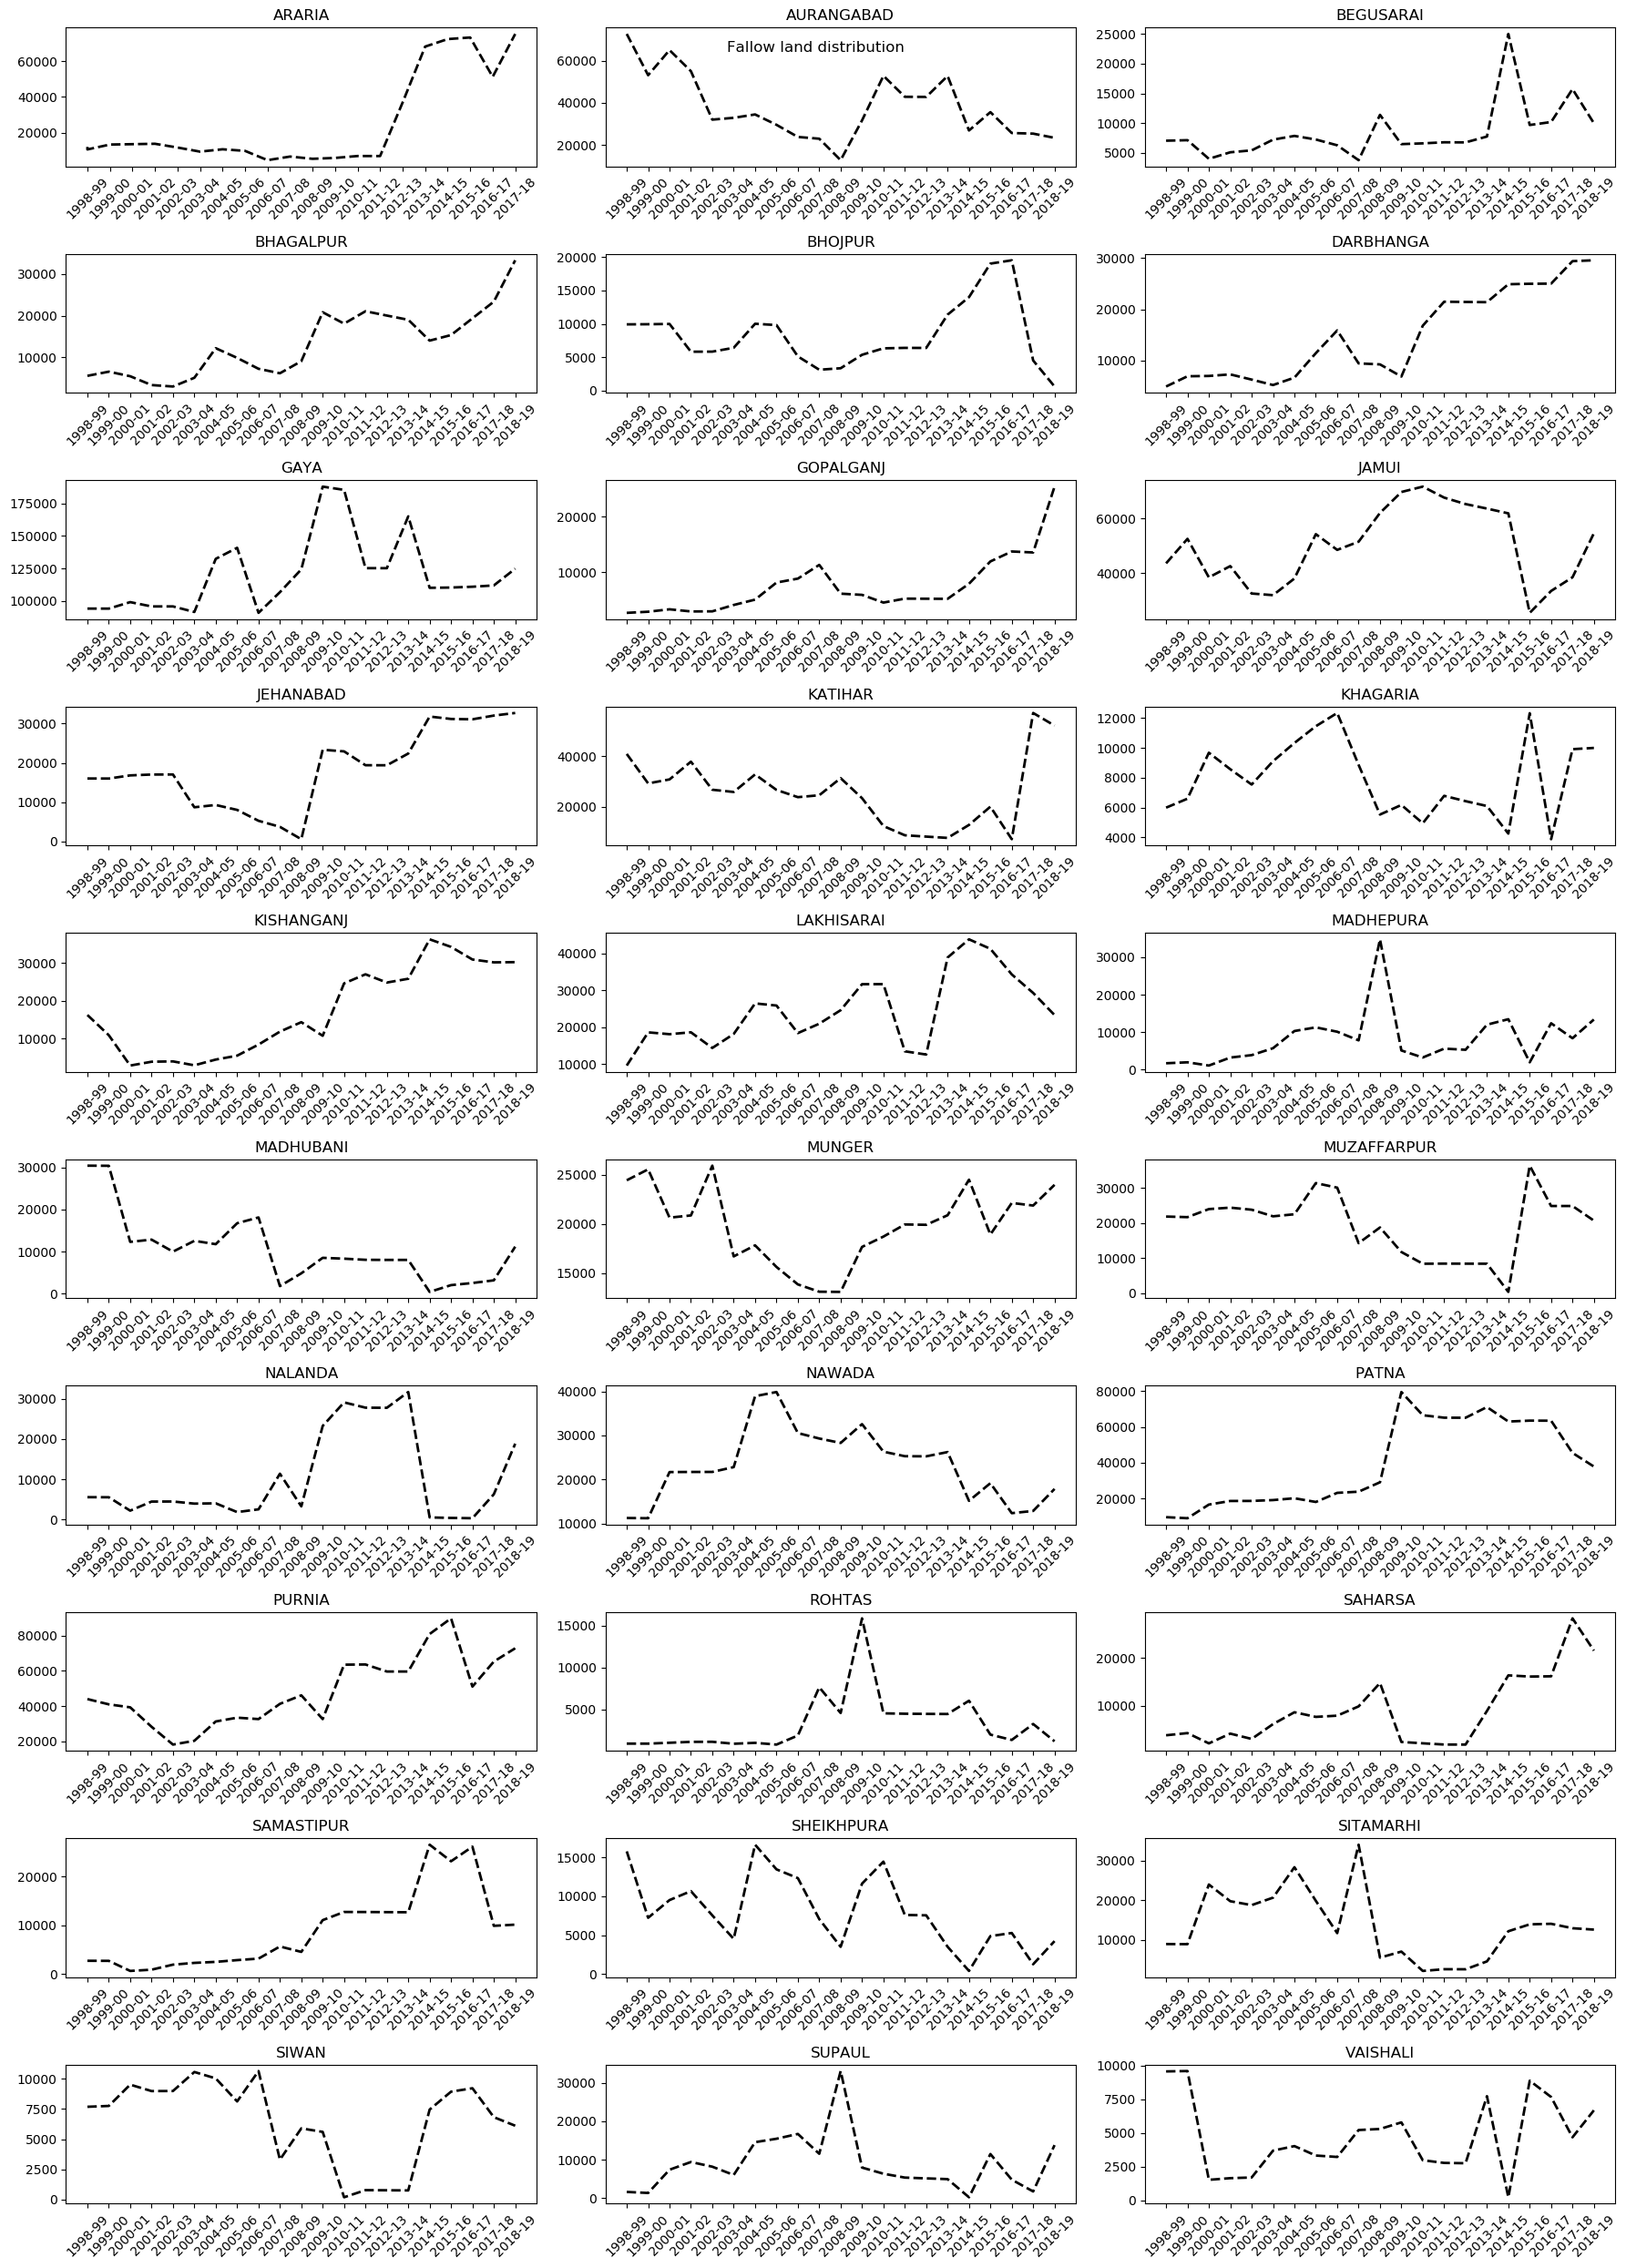

In [28]:
ct = 1
fig = mplot.figure(figsize=(18,25),dpi=100)
for i in df_fallow_land['District'].unique():
    tp= df_fallow_land[df_fallow_land['District']==i]
    mplot.subplot(10,3,ct)
    mplot.plot(tp.iloc[:,3],tp.iloc[:,1],linewidth=2,color='black',linestyle='dashed')
    mplot.title(i)
    ct+=1
    mplot.xticks(rotation=45)
    
mplot.tight_layout()
fig.suptitle("Fallow land distribution")
mplot.show()


### Finding whether fallow lands depends on Rainfall last year

In [29]:
df_fallow_land=pd.merge(df_rain.rename(columns={"District": "District", "yearC": "yearC"}),df_fallow_land,how='inner')


In [30]:
df_fallow_land

,District,Avg rain,Total rain,yearC,Fallow Lands Other Than Current Fallows,Current Fallow,Year
0,ARARIA,360,2344,1998,3330,11972,1998-99
1,ARARIA,360,2344,1998,3320,10535,1998-99
2,ARARIA,295,1922,1999,3315,13277,1999-00
3,ARARIA,257,1676,2000,3313,13482,2000-01
4,ARARIA,281,1830,2001,3308,13703,2001-02
...,...,...,...,...,...,...,...
610,SHEIKHPURA,92,601,2018,1604,4236,2018-19
611,SITAMARHI,140,914,2018,464,12604,2018-19
612,SIWAN,96,626,2018,1405,6111,2018-19
613,SUPAUL,142,923,2018,9403,13778,2018-19


### Max Rainfall leads to less fellow land (assumption)
#### Inverse Correlation can give out the results

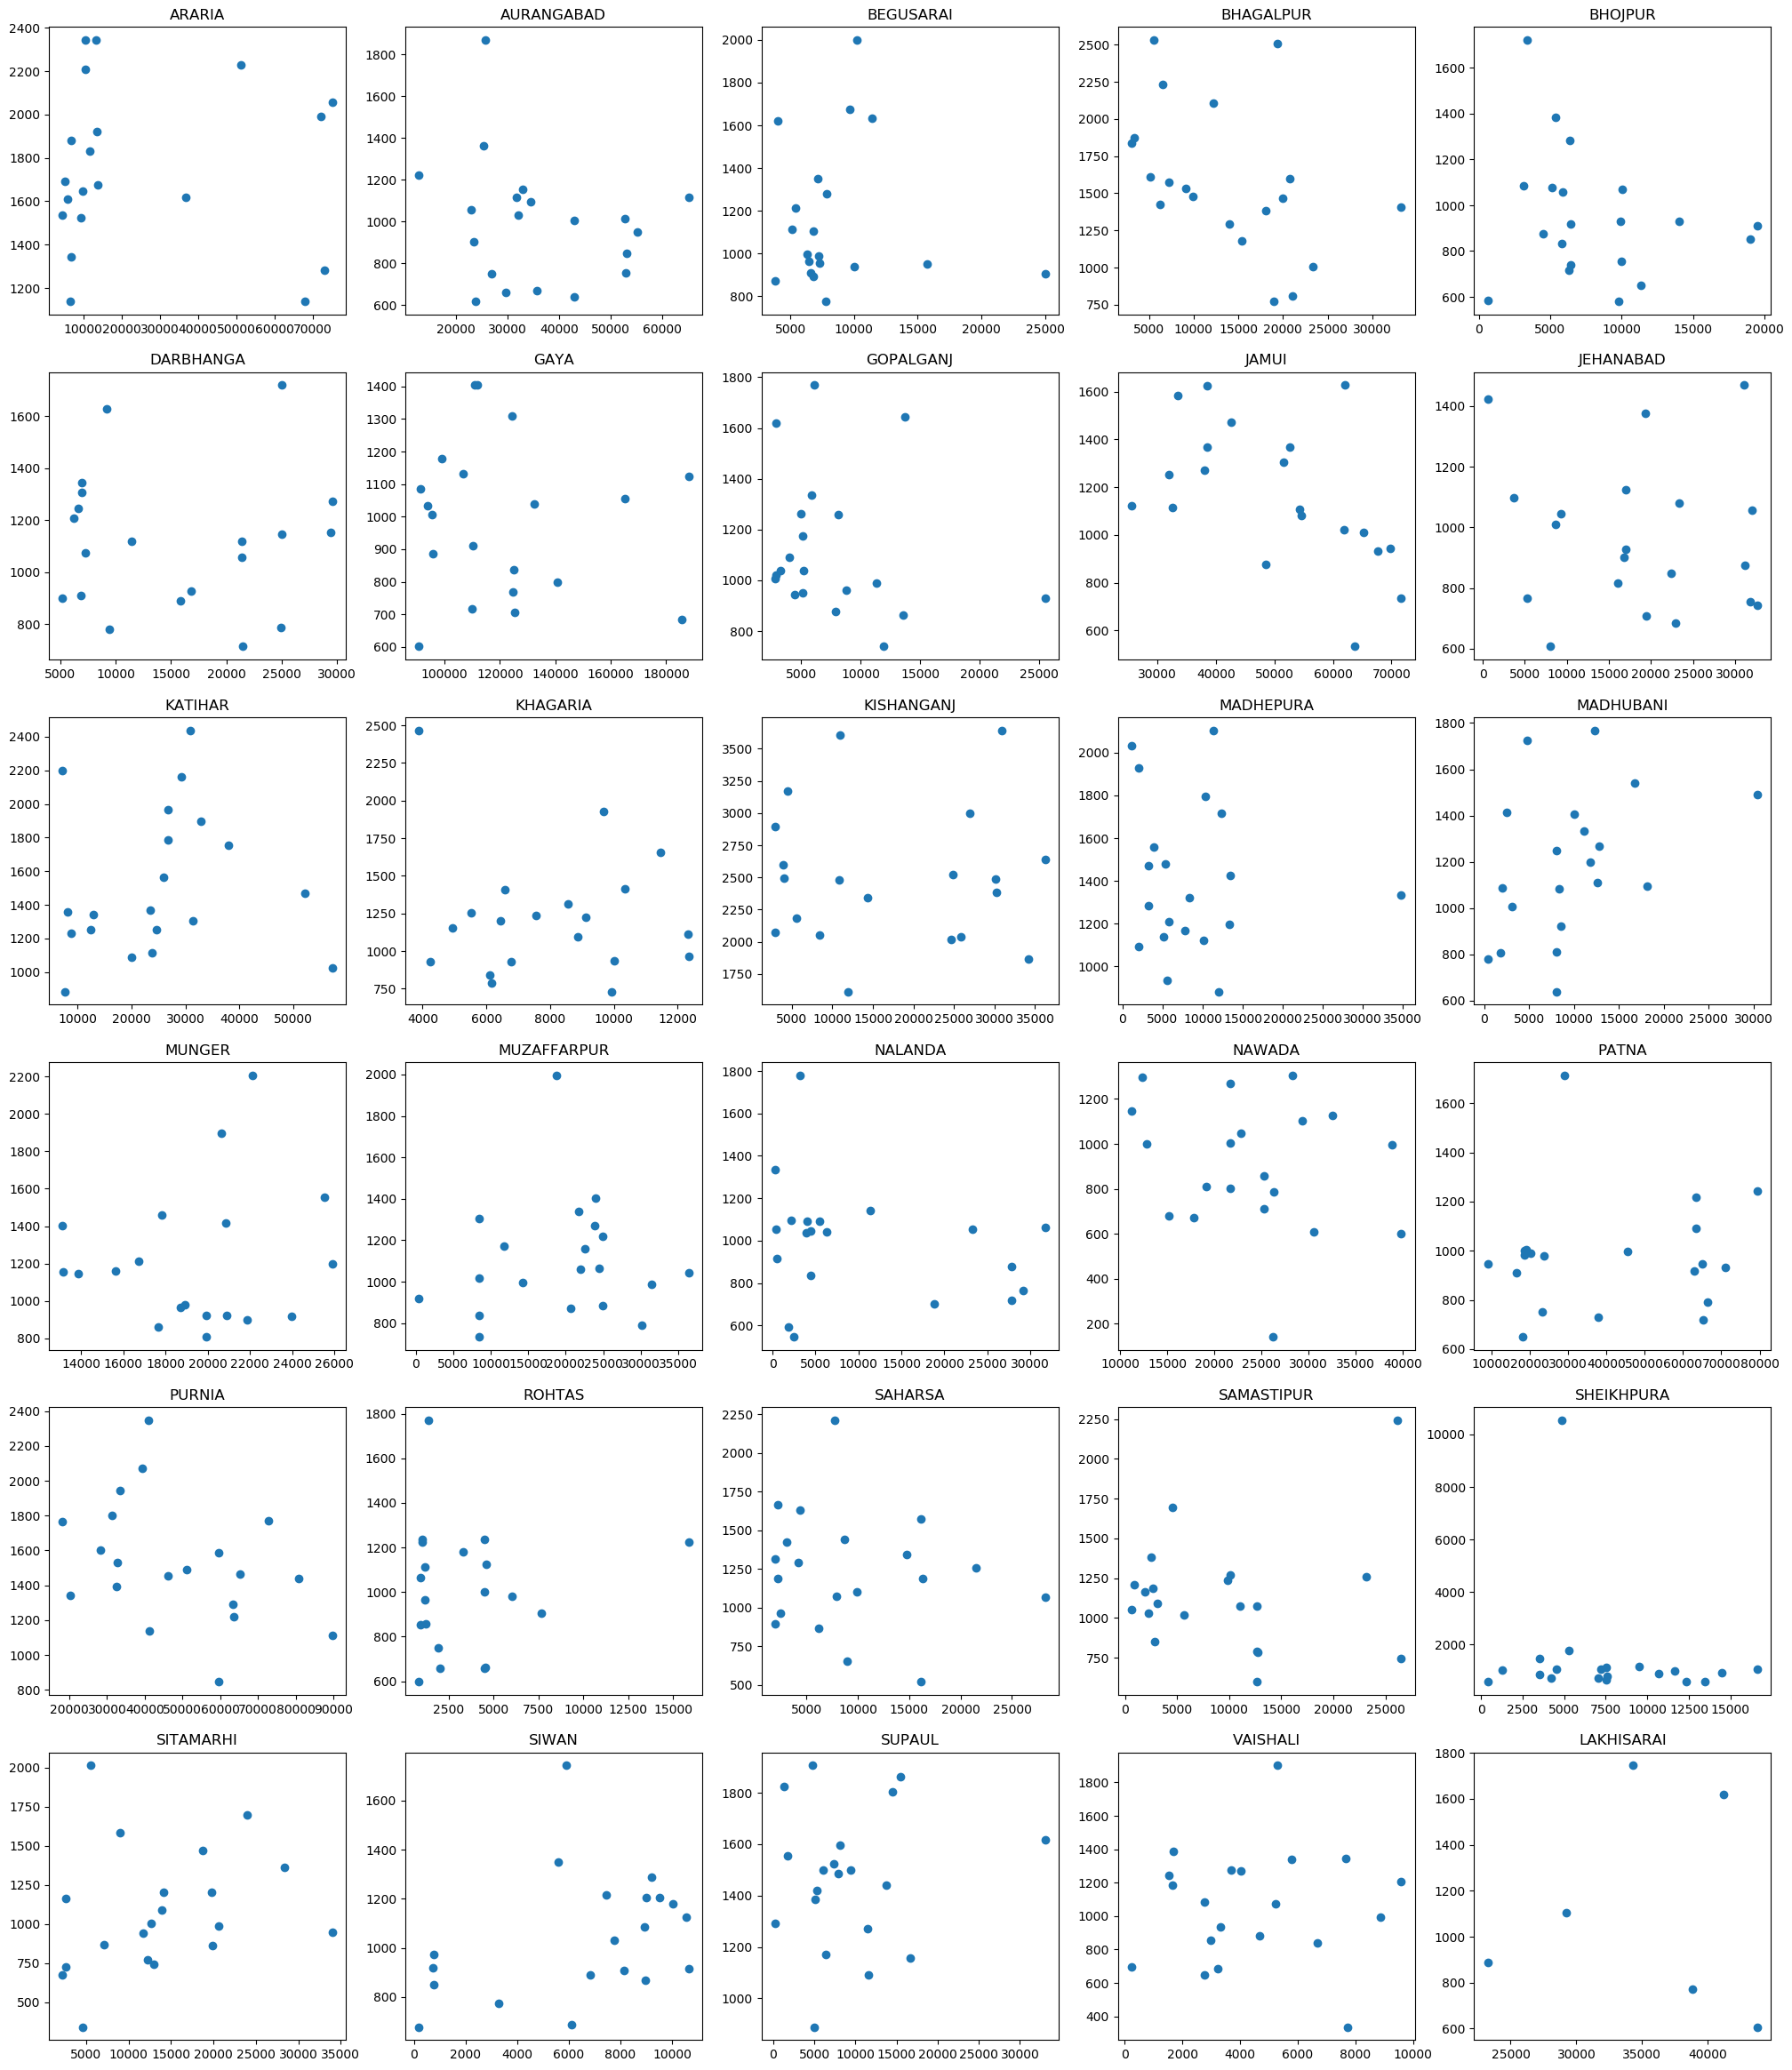

In [31]:
ct = 1
fig = mplot.figure(figsize=(25,30),dpi=100)
for i in df_fallow_land['District'].unique():
    tp= df_fallow_land[df_fallow_land['District']==i]
    mplot.subplot(6,5,ct)
    mplot.scatter(tp.iloc[1:,5],tp.iloc[:-1,2])
    mplot.title(i)
    ct+=1
#     mplot.xticks(rotation=45)
    
# mplot.tight_layout()
# fig.suptitle("Fallow land distribution")
mplot.show()
# tp.iloc[:,2]

### Whether fallow lands becoming Non Agricluture Use in future

##### If it is so then with increasing fallow there must be hike in Barren or Non agricultural uses lands

In [32]:
df_noncult_land['District'].unique()

array(['ARARIA', 'AURANGABAD', 'GAYA', 'JAMUI', 'JEHANABAD', 'KATIHAR',
       'LAKHISARAI', 'MUNGER', 'NALANDA', 'NAWADA', 'ROHTAS'],
      dtype=object)

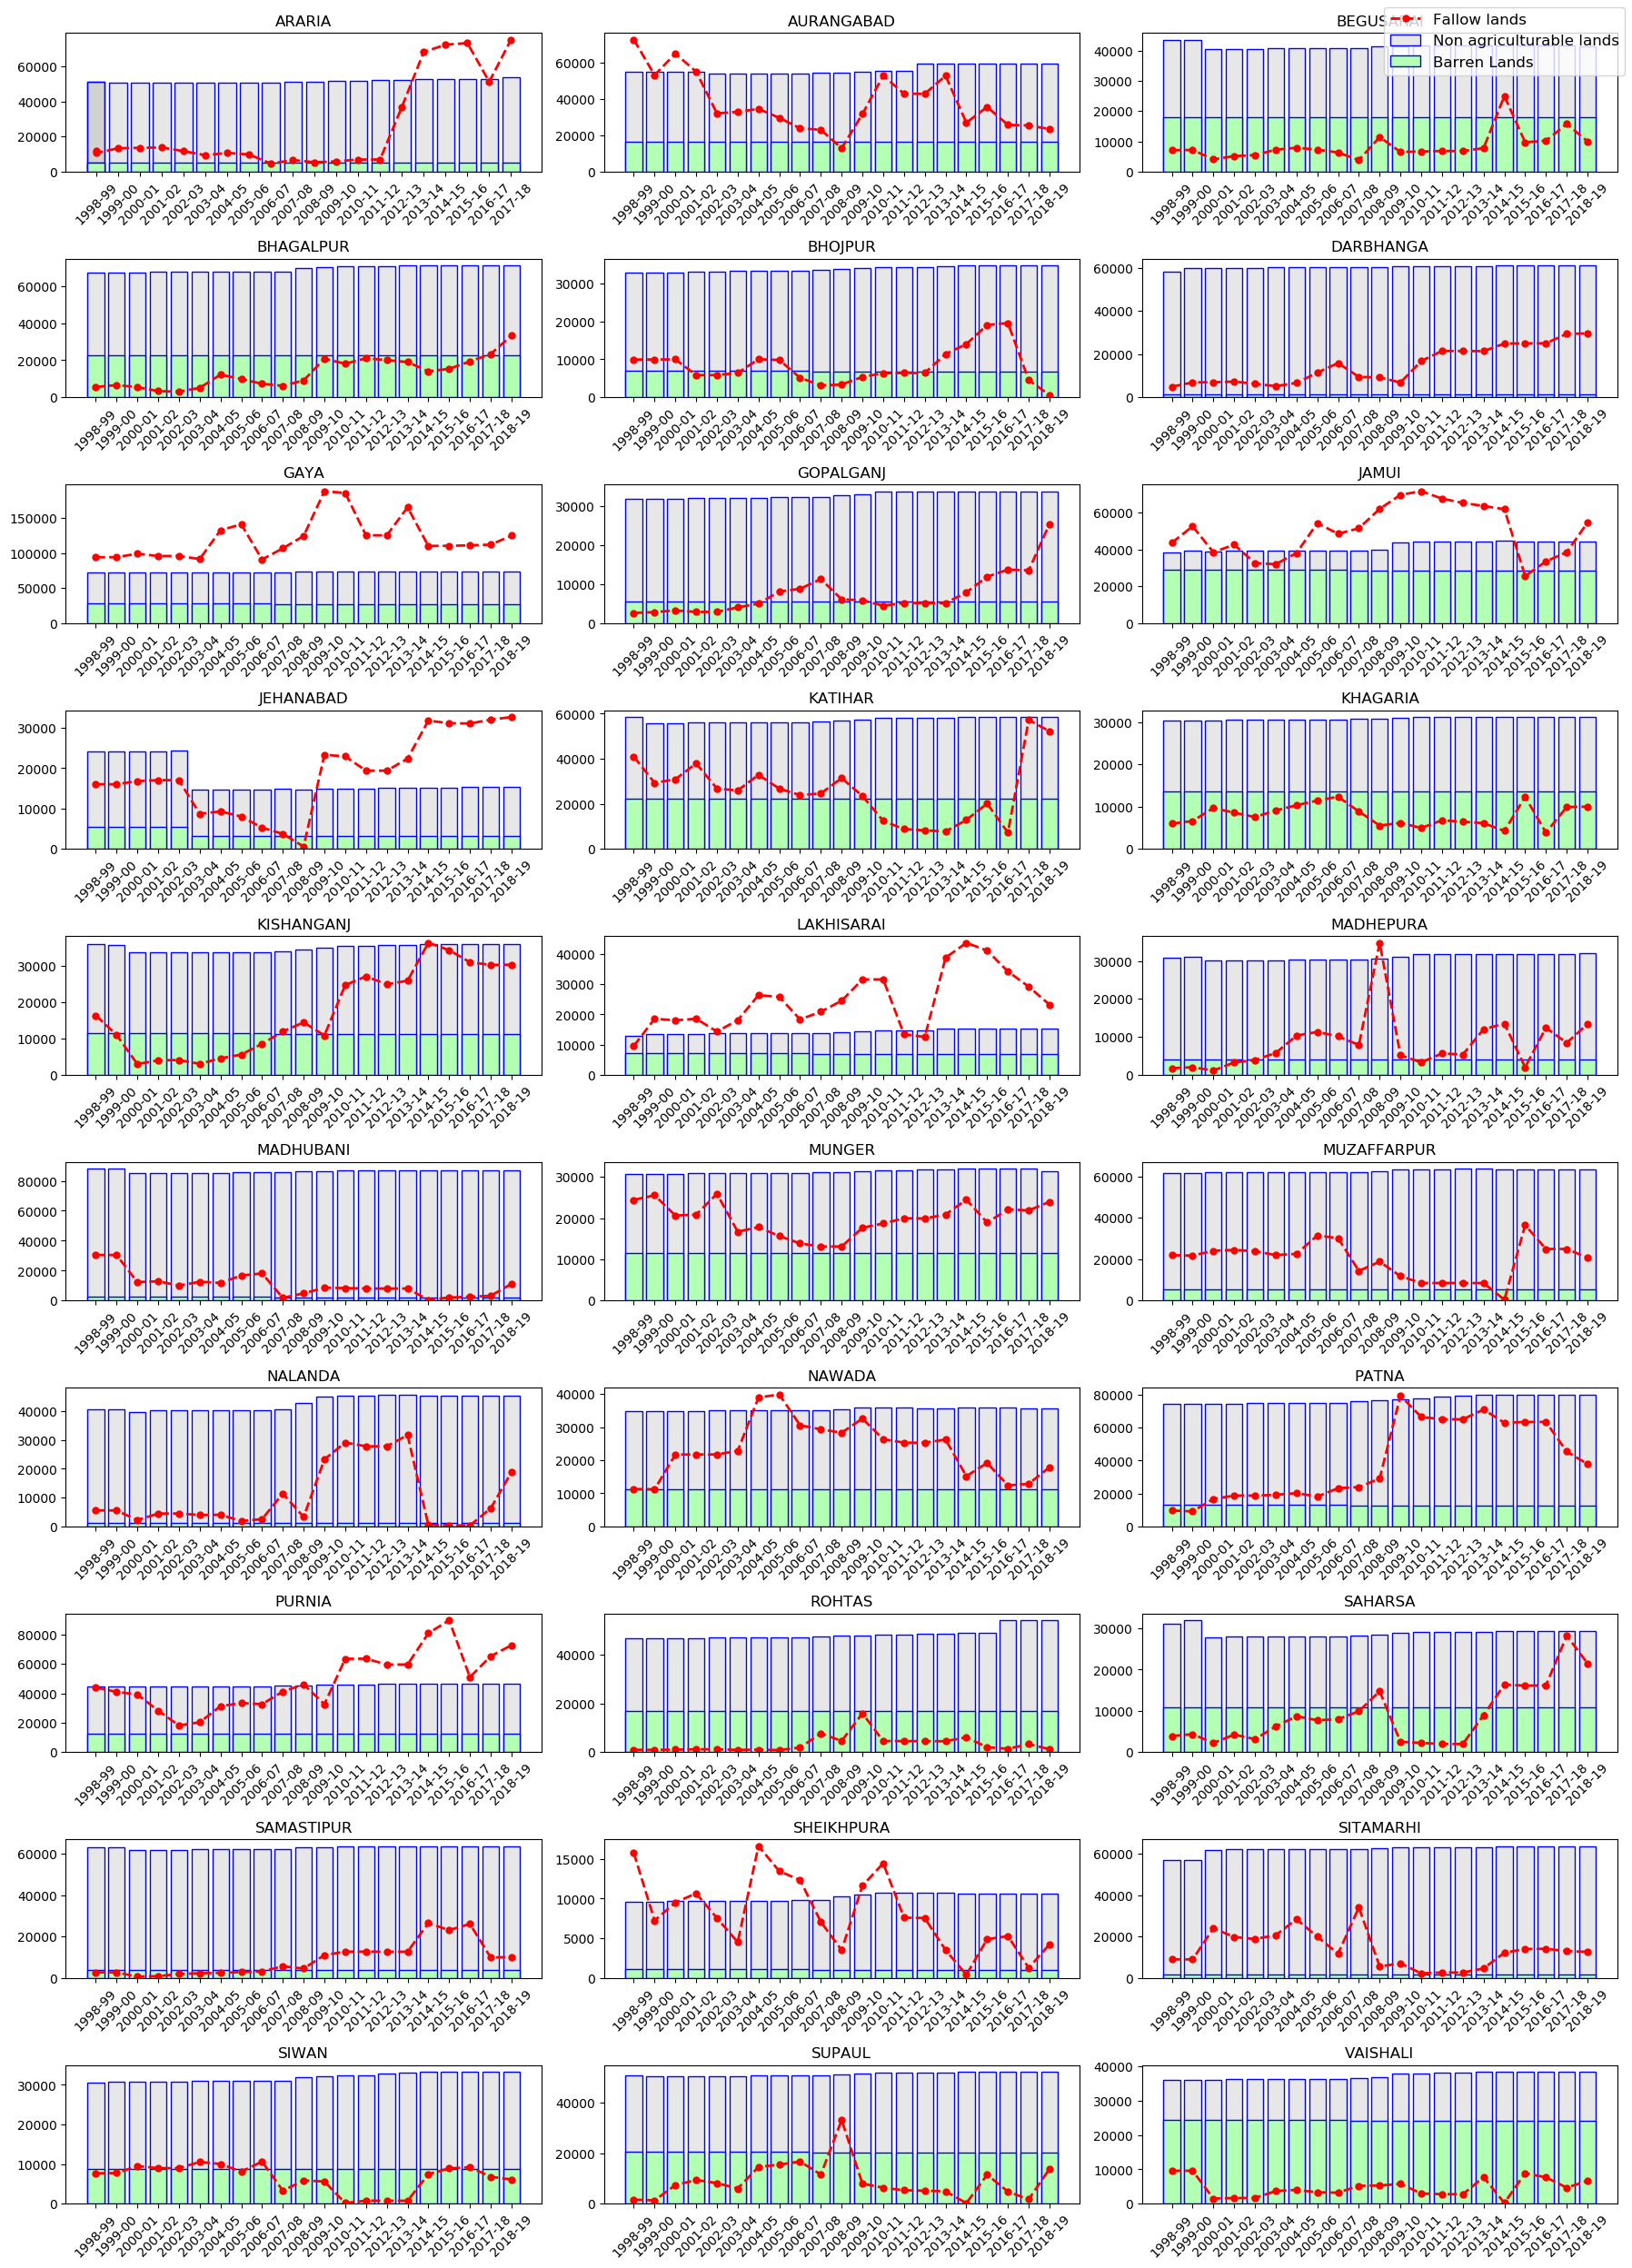

In [33]:
df_fallow_land=df[['Current Fallow','District','Year','Area Under Non Agricultural Uses NC','Barren and Unculturable Land NC']]
ct = 1
fig = mplot.figure(figsize=(18,25),dpi=100)
for i in df_cult_land['District'].unique():
    tp= df_fallow_land[df_fallow_land['District']==i]
    mplot.subplot(10,3,ct)
    mplot.bar(tp.iloc[:,2],tp.iloc[:,3],color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
    mplot.plot(tp.iloc[:,2],tp.iloc[:,0],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=5)
    mplot.bar(tp.iloc[:,2],tp.iloc[:,4],color='#b3ffb3',  edgecolor='blue')
    mplot.title(i)
    ct+=1
    mplot.xticks(rotation=45)
fig.legend(["Fallow lands","Non agriculturable lands",'Barren Lands'], loc ="upper right",fontsize='large')

mplot.tight_layout()
mplot.show()

### How fallow lands Affects on cropped and Net sown area lands 

##### With increasing fallow, cropped or net sown area must show downward trend


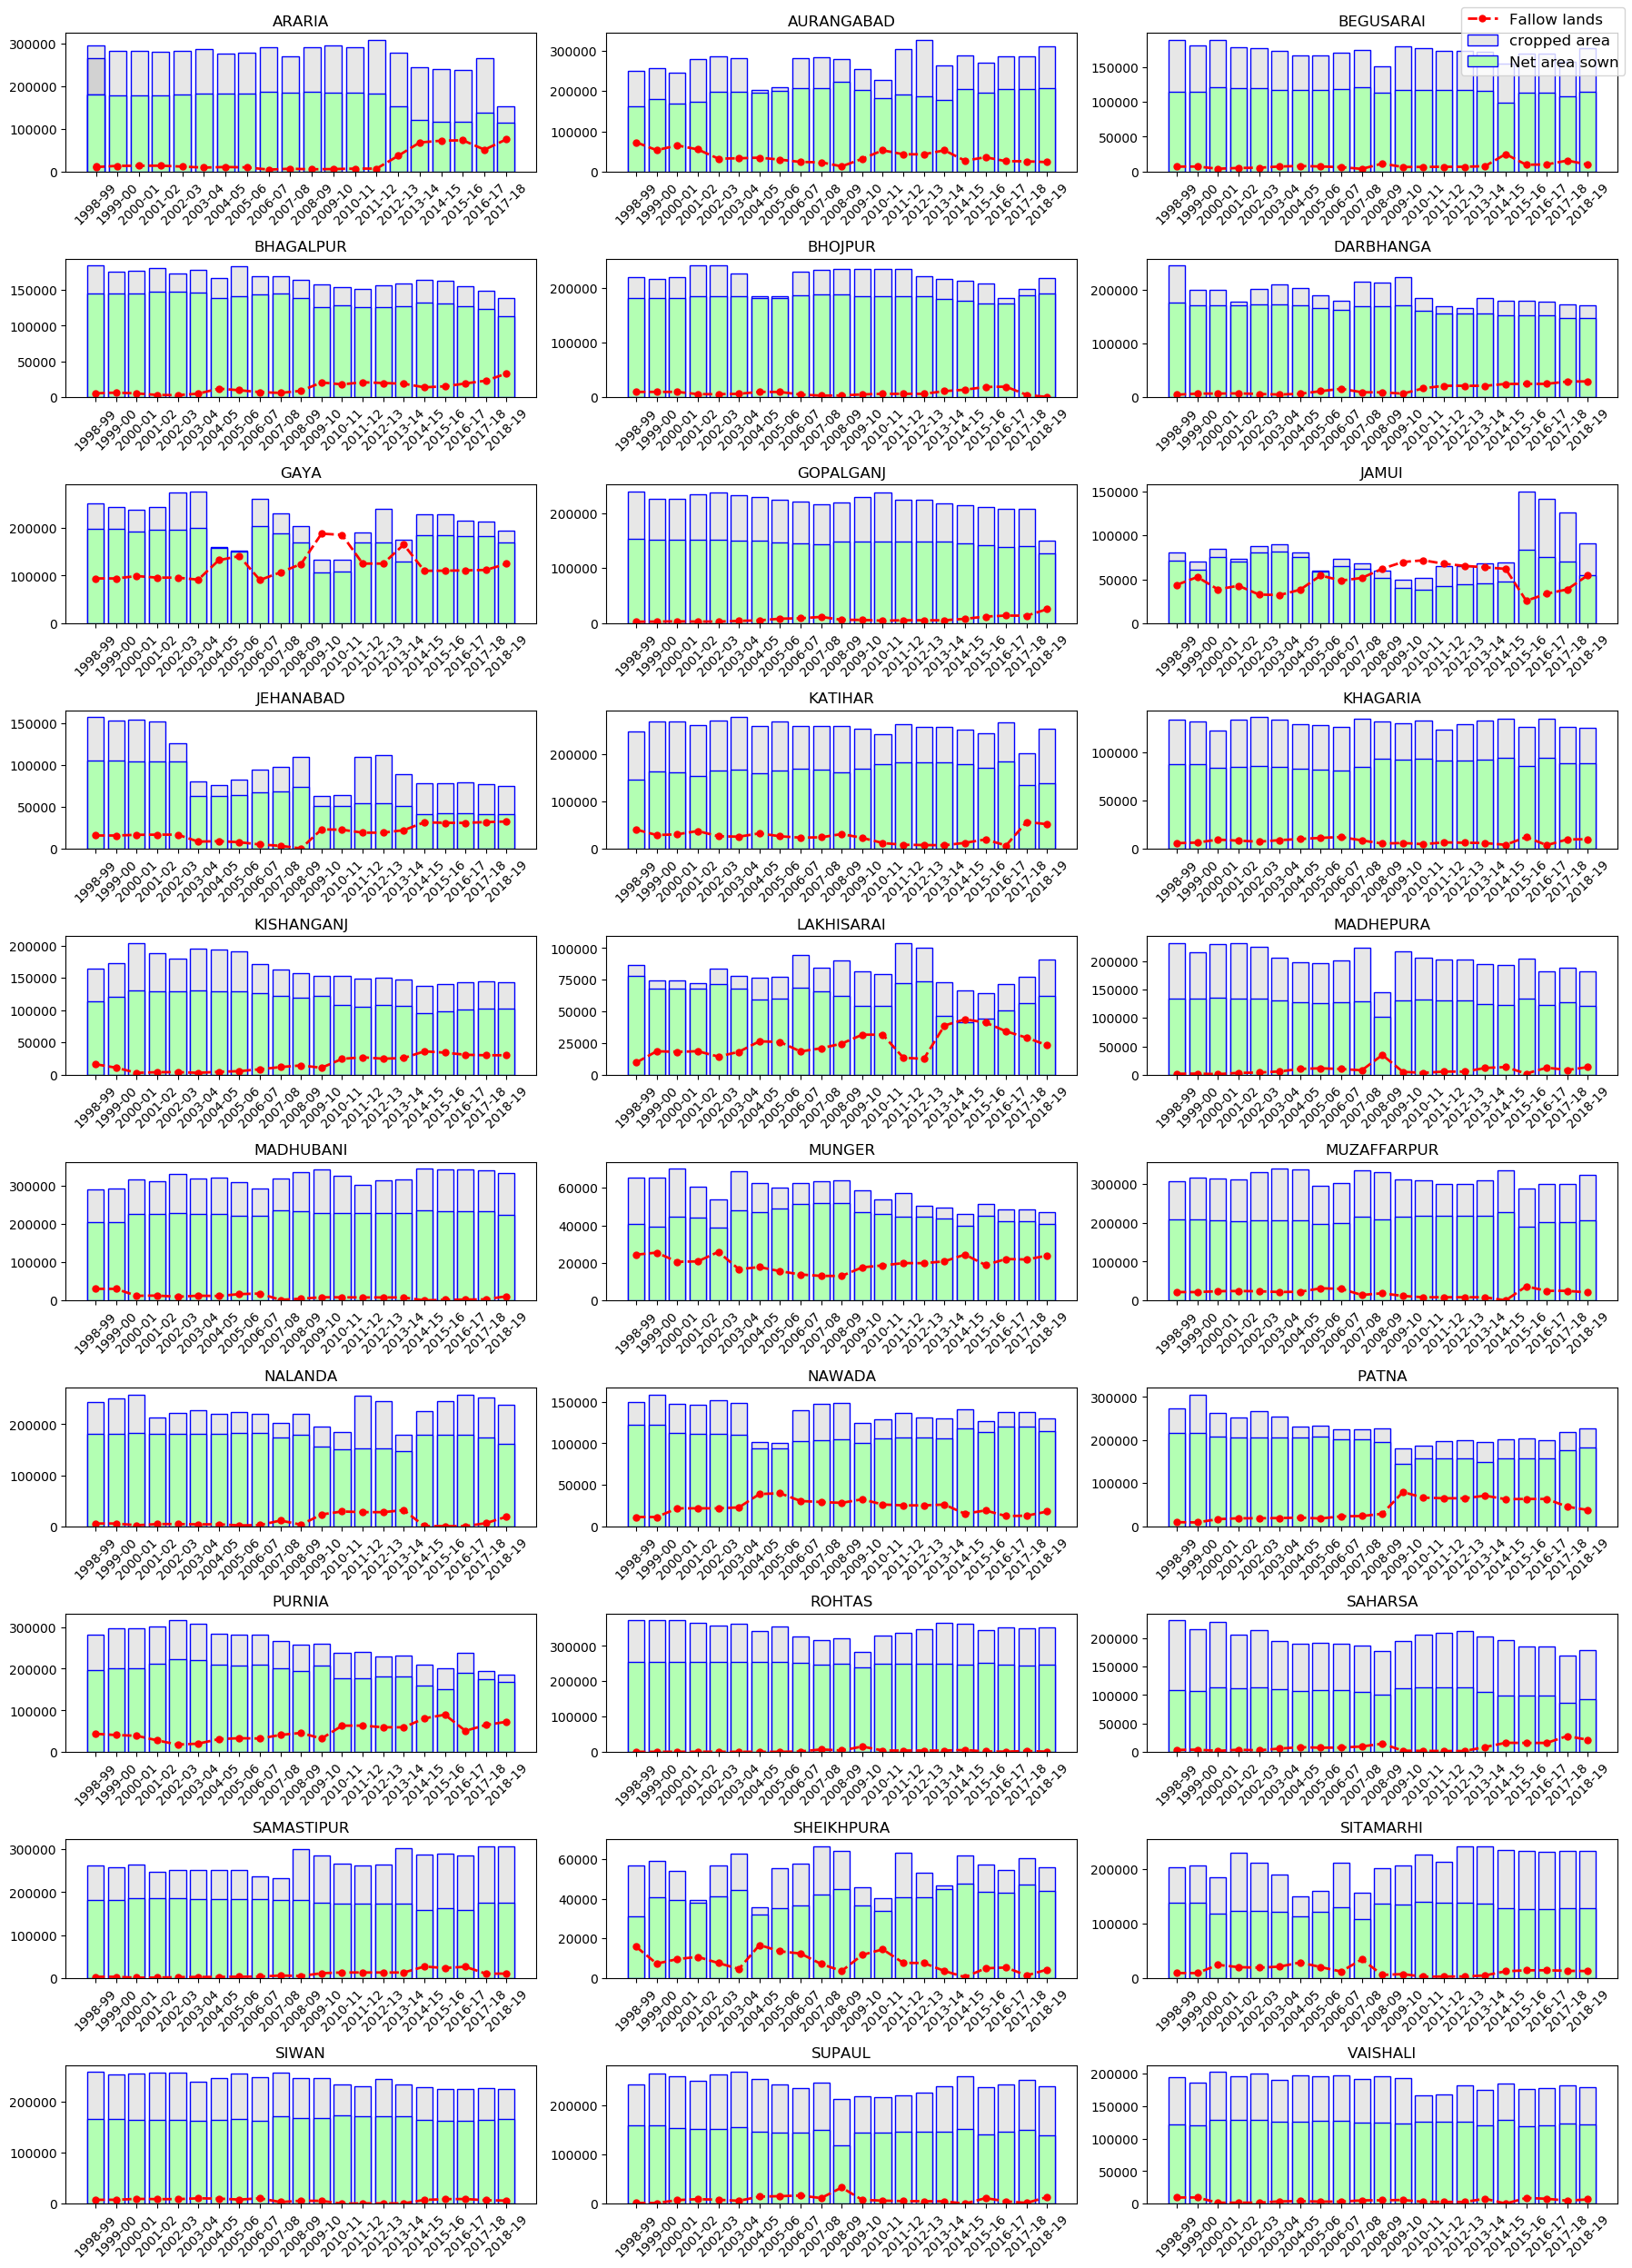

In [34]:
df_fallow_land=df[['Current Fallow','District','Year','Net Area Sown','Cropped Area']]
ct = 1
fig = mplot.figure(figsize=(18,25),dpi=100)
for i in df_cult_land['District'].unique():
    tp= df_fallow_land[df_fallow_land['District']==i]
    mplot.subplot(10,3,ct)
    mplot.bar(tp.iloc[:,2],tp.iloc[:,4],color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
    mplot.plot(tp.iloc[:,2],tp.iloc[:,0],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=5)
    mplot.bar(tp.iloc[:,2],tp.iloc[:,3],color='#b3ffb3',  edgecolor='blue')
    mplot.title(i)
    ct+=1
    mplot.xticks(rotation=45)
fig.legend(["Fallow lands",'cropped area',"Net area sown"], loc ="upper right",fontsize='large')

mplot.tight_layout()
mplot.show()